<a href="https://colab.research.google.com/github/ssupsandeep/PRODIGY_ML_02/blob/main/PRODIGY_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

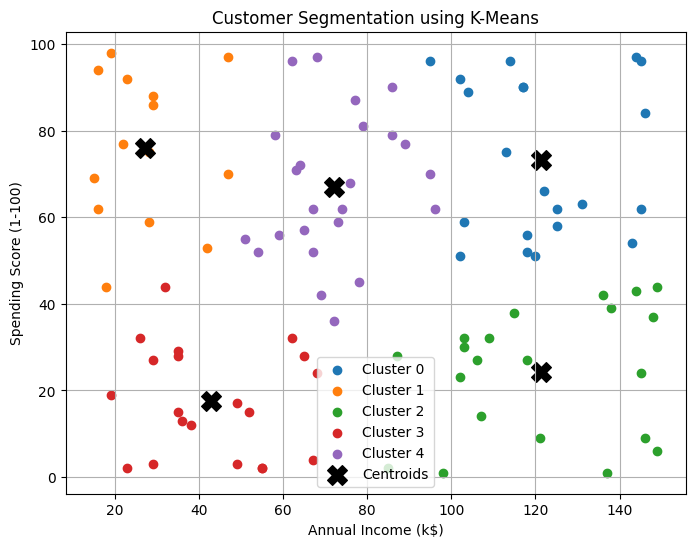

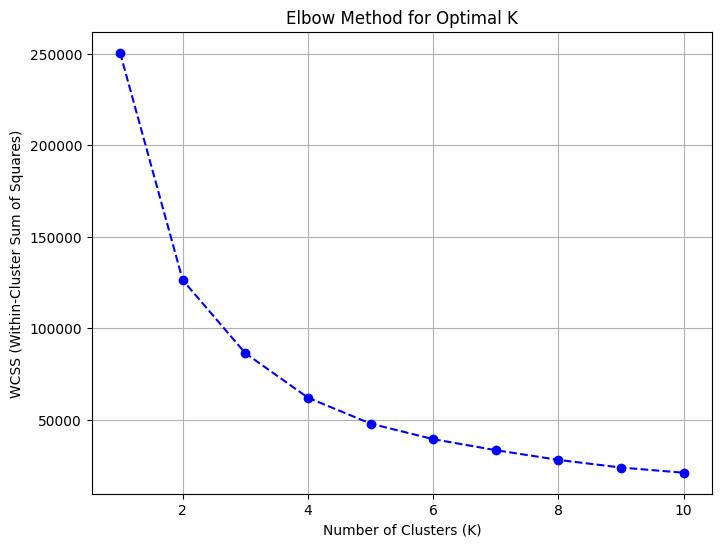

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate synthetic customer data (or load from a CSV file)
np.random.seed(42)
annual_income = np.random.randint(15, 150, 100)  # Random annual income values (15k to 150k)
spending_score = np.random.randint(1, 100, 100)  # Random spending scores (1-100)
data = pd.DataFrame({'AnnualIncome': annual_income, 'SpendingScore': spending_score})

# Apply K-Means clustering with the optimal number of clusters (e.g., 5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data[['AnnualIncome', 'SpendingScore']])

# 📌 Plot Scatter Plot (Customer Segmentation) First
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data["AnnualIncome"], cluster_data["SpendingScore"], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.grid(True)
plt.show()

# 📌 Elbow Method to find the optimal number of clusters (Displays Second)
wcss = []
for k in range(1, 11):  # Testing K values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data[['AnnualIncome', 'SpendingScore']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()